# Permiso
En este espacio se concede el permiso al entorno para ingresar a los archivos de Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Clonar y Configurar Darknet**

In [ ]:
%cd /content
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet

/content
Cloning into 'darknet'...
remote: Enumerating objects: 15900, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 15900 (delta 23), reused 11 (delta 11), pack-reused 15860 (from 3)
Receiving objects: 100% (15900/15900), 14.51 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (10694/10694), done.
/content/darknet


**CUDA**


In [ ]:
!apt-get update
!apt-get install build-essential
!apt-get install libopencv-dev
!apt-get install python3-dev

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,665 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,901 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,717 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,245 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,282 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 https:

**Activar GPU, CUDNN y OpenCV en Makefile:**

In [ ]:
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

In [ ]:
!make -j

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unk

In [ ]:
%cd /content/darknet
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3-tiny.conv.15 -O yolov3-tiny.conv.15

/content/darknet
--2025-05-08 04:05:02--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3-tiny.conv.15
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-08 04:05:02 ERROR 404: Not Found.



In [ ]:
%cd /content/darknet
!make clean                      # borra objetos viejos
!make -j                         #la nueva ARCH

/content/darknet
rm -rf ./obj/image_opencv.o ./obj/http_stream.o ./obj/gemm.o ./obj/utils.o ./obj/dark_cuda.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/darknet.o ./obj/detection_layer.o ./obj/captcha.o ./obj/route_layer.o ./obj/writing.o ./obj/box.o ./obj/nightmare.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/coco.o ./obj/dice.o ./obj/yolo.o ./obj/detector.o ./obj/layer.o ./obj/compare.o ./obj/classifier.o ./obj/local_layer.o ./obj/swag.o ./obj/shortcut_layer.o ./obj/representation_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/rnn.o ./obj/rnn_vid.o ./obj/crnn_layer.o ./obj/demo.o ./obj/tag.o ./obj/cifar.o ./obj/go.o ./obj/batchnorm_layer.o ./obj/art.o ./obj/reg

Antes de correr la siguiente linea, se deben de subir los siguientes archivos.

1. En la carpeta cfg existe un archivo yolov3-tiny.cfg, es el archivo en donde esta el modelo con todas las clases, filtro. Se debe de reemplazar por el de la carpeta y modificar el numero de clases.
2. En la carpeta de darknet, subir los archivos obt.name, obt.data, train.txt, val.txt, que es en donde contiene las direcciones de los archivos o carpetas en drive (Se debe de modificar segun necesida)
3. La estructura para los archivos train y val, tanto para el yolov3 como para el yolov4, deben estar en las misma carpeta, su imagen con su respectiva etiqueta. Ejemplo image1.jpg, image1.txt...

In [ ]:
!./darknet detector train obj.data cfg/yolov3-tiny.cfg yolov3-tiny.conv.15 -dont_show -map

Se han truncado las últimas 5000 líneas del flujo de salida.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.011259, iou_loss = 0.000000, total_loss = 0.011259 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.573622), count: 5, class_loss = 1.240431, iou_loss = 0.974605, total_loss = 2.215036 
 total_bbox = 254826, rewritten_bbox = 8.094935 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.000074, iou_loss = 0.000000, total_loss = 0.000074 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.506884), count: 11, class_loss = 2.371152, iou_loss = 1.772098, total_loss = 4.143250 
 total_bbox = 254837, rewritten_bbox = 8.095370 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.000350, iou_loss = 0.000000, total_loss = 0.0003

In [ ]:
!./darknet detector train obj.data cfg/yolov3-tiny.cfg backup/yolov3-tiny_last.weights -dont_show

Se han truncado las últimas 5000 líneas del flujo de salida.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.656723), count: 14, class_loss = 2.680055, iou_loss = 2.329829, total_loss = 5.009884 
 total_bbox = 1342640, rewritten_bbox = 8.092043 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.617422), count: 14, class_loss = 1.380856, iou_loss = 1.569733, total_loss = 2.950589 
 total_bbox = 1342654, rewritten_bbox = 8.092107 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.000995, iou_loss = 0.000000, total_loss = 0.000995 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.712105), count: 6, class_loss = 0.824255, iou_loss = 0.430653, total_loss = 1.2

En este espacio se valida con imagenes, se sube la imagen al entorno (la ruta de la imagen se debe de cambiar por la ruta de la imagen cargada)

In [ ]:
%cd /content/darknet
!./darknet detector test obj.data cfg/yolov3-tiny.cfg backup/yolov3-tiny_final.weights /content/video_38_frame_0003.jpg -thresh 0.5

/content/darknet
 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
 

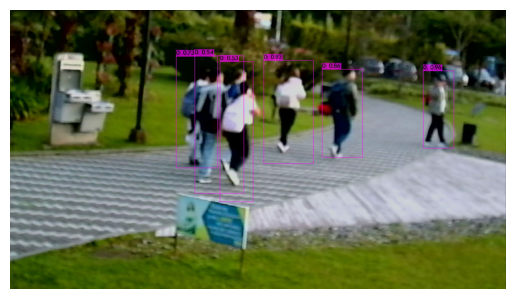

In [ ]:
import cv2
import matplotlib.pyplot as plt

pred_img = cv2.imread('/content/darknet/predictions.jpg')
pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
plt.imshow(pred_img)
plt.axis('off')
plt.show()

In [ ]:
%cd /content/darknet
!./darknet detector test obj.data cfg/yolov3-tiny.cfg backup/yolov3-tiny_final.weights /content/video_40_frame_0015.jpg -thresh 0.5

/content/darknet
 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
 

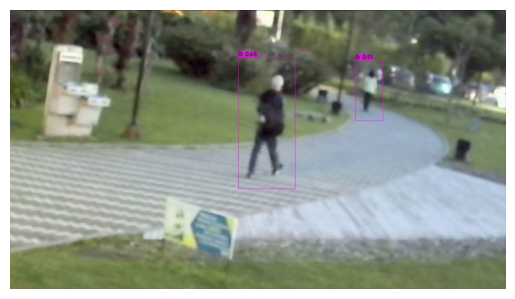

In [ ]:
import cv2
import matplotlib.pyplot as plt

pred_img = cv2.imread('/content/darknet/predictions.jpg')
pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
plt.imshow(pred_img)
plt.axis('off')
plt.show()

In [ ]:
%cd /content/darknet
!./darknet detector test obj.data cfg/yolov3-tiny.cfg backup/yolov3-tiny_final.weights /content/VÃ­deo_8_frame_0005.jpg -thresh 0.5

/content/darknet
 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
 

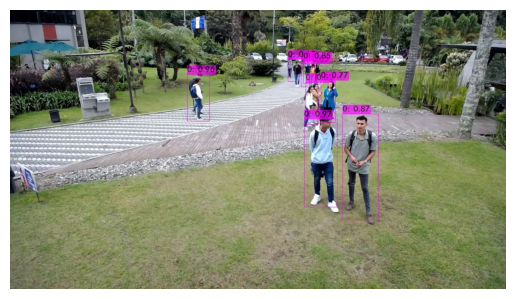

In [ ]:
pred_img = cv2.imread('/content/darknet/predictions.jpg')
pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
plt.imshow(pred_img)
plt.axis('off')
plt.show()

In [ ]:
%cd /content/darknet
!./darknet detector test obj.data cfg/yolov3-tiny.cfg backup/yolov3-tiny_final.weights /content/Video_1_frame_0007.jpg -thresh 0.6

/content/darknet
 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
 

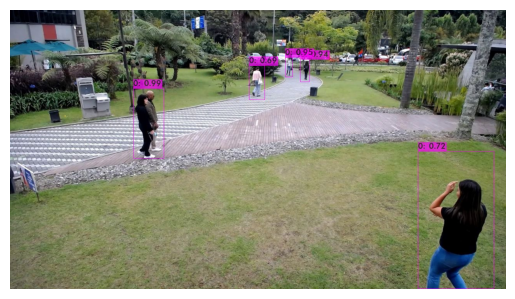

In [ ]:
pred_img = cv2.imread('/content/darknet/predictions.jpg')
pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
plt.imshow(pred_img)
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
files.download('/content/darknet/backup/yolov3-tiny_last.weights')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>